<a href="https://colab.research.google.com/github/daewoung/DLForMusicAndAudio_Study/blob/main/1_Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torchaudio
import IPython.display as ipd 
y, sr = torchaudio.load('/content/PADO.wav')

#Stereo to Mono
y_left = y[0]
y_right = y[1]

y_mono = y.mean(dim=0)

y_mono = y_mono[300000:800000] 
print(y_mono.shape, sr, y_mono)
ipd.Audio(y_mono, rate=sr)

torch.Size([500000]) 48000 tensor([-0.2394, -0.2436, -0.2373,  ..., -0.0962, -0.1283, -0.1336])


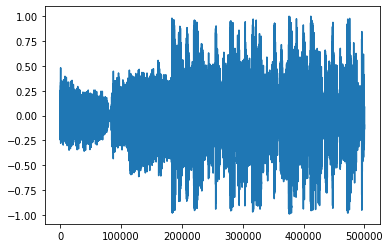

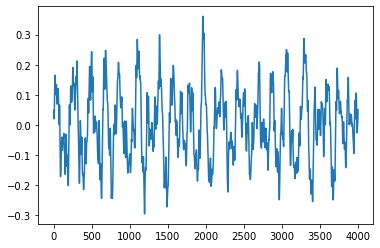

In [42]:
# Display Wave 4 Second -> 20만개의 Tensor를 보여줌
import matplotlib.pyplot as plt
plt.figure(1)
#plt.subplot(2, 2, 1)
plt.plot(y_mono)
#plt.subplot(2, 2, 2)
plt.figure(2)
plt.plot(y_mono[4000:8000])
plt.show()

# Spectrogram

In [43]:
# torchaudio에서는 텐서를 spectrogram으로 전환해주는 기능이 존재
# 2가지 방법 Fucntional / Class 
import torch

#functional, 일반적으론 class 버전으로 사용한다.
spec = torchaudio.functional.spectrogram(y_mono, 
                                         n_fft = 2048,
                                         hop_length=1024,
                                         pad = 0,
                                         win_length = 2048,
                                         power = True,
                                         normalized =True,
                                         window = torch.hann_window(2048)
                                         )

#class Ver, 딥러닝 시 여러 데이터를 바로 변환해주는게 편하기 때문에 클래스 버전으로 주로 사용
spec_converter = torchaudio.transforms.Spectrogram(n_fft = 2048,
                                                    )
spec_ = spec_converter(y_mono)


In [68]:
# center == True일때 0번째 hop window의 중심 샘플은 = 0 * hop_length, 즉 hop_length
# center == False 0번째 hop window의 첫 샘플은 = 0 * hop_length
def rect_window(win_size):
  return torch.ones(win_size)

single_spec_converter = torchaudio.transforms.Spectrogram(n_fft = 2048, hop_length = 2048, 
                                                          center = False, window_fn = rect_window)

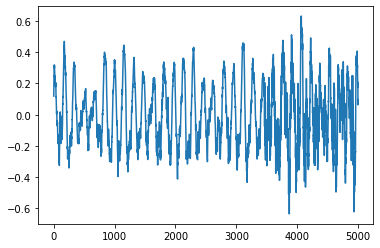

In [50]:
#5초부터 10초
y_clip = y_mono[5*sr: 10*sr]
ipd.Audio(y_clip, rate= sr)
plt.plot(y_clip[:5000])

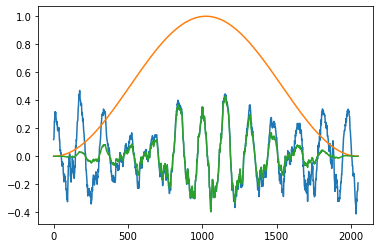

In [53]:
n_fft = 2048
window_tensor = torch.hann_window(2048)
sample_slice = y_clip[0:n_fft]
windowed_slice = sample_slice*window_tensor
plt.plot(sample_slice)
plt.plot(window_tensor)
plt.plot(windowed_slice)

# hann_window를 그냥 사용 시 원래 정보가 왜곡되는 것을 확인할 수 있다.
# 그렇기 때문에 hop_size를 활용하여 정보의 왜곡을 최소화 하는 것 


(torch.Size([1025, 1]), [<matplotlib.lines.Line2D at 0x7fd361f69b10>])

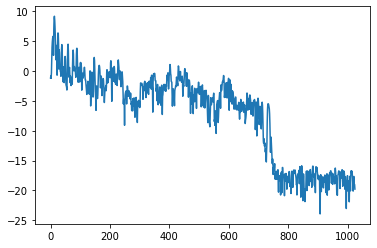

In [56]:
fft_result = single_spec_converter(windowed_slice)
fft_result.shape, plt.plot(torch.log(fft_result))


In [46]:
spec.shape, spec_.shape

(torch.Size([1025, 489]), torch.Size([1025, 489]))

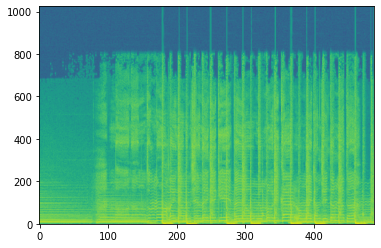

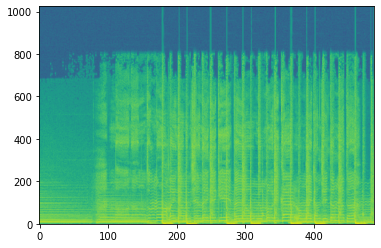

In [47]:
plt.figure(1)
plt.imshow(torch.log(spec), aspect = 'auto', origin = 'lower')

plt.figure(2)
plt.imshow(torch.log(spec_), aspect = 'auto', origin = 'lower')


In [69]:
n_fft = 2048 // 4
window_tensor = torch.hann_window(n_fft)
hop_length = 512 // 4

single_spec_converter = torchaudio.transforms.Spectrogram(n_fft=n_fft,
                                                          hop_length=n_fft,
                                                         center=False,
                                                          window_fn=rect_window
                                                    )

total_result = []
for hop_start in range(0, len(y_clip)-n_fft, hop_length):
  sample_slice = y_clip[hop_start:hop_start+n_fft]
  windowed_slice = sample_slice * window_tensor

  fft_result = single_spec_converter(windowed_slice) # windowed_slice에 FFT 연산 실행
  total_result.append(fft_result)


In [70]:
total_result[0].shape

torch.Size([257, 1])

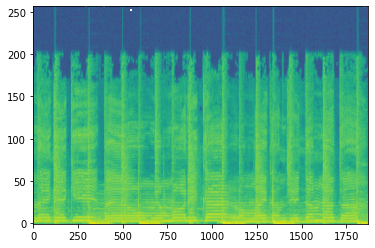

In [73]:
tortal_spec = torch.cat(total_result, dim = 1)
tortal_spec .shape 
plt.imshow(torch.log(tortal_spec),aspect = 'auto', origin = 'lower')

# Mel Spectrogram

(<matplotlib.image.AxesImage at 0x7fd361e5ee10>, torch.Size([1025, 235]))

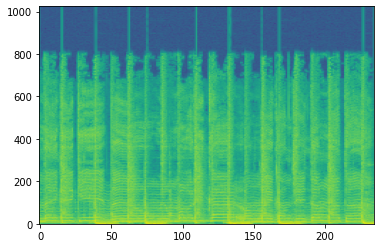

In [75]:
spec_converter = torchaudio.transforms.Spectrogram(n_fft = 2048,
                                                    )
spec = spec_converter(y_clip)
plt.imshow(torch.log(spec), aspect = 'auto', origin = 'lower'), spec.shape

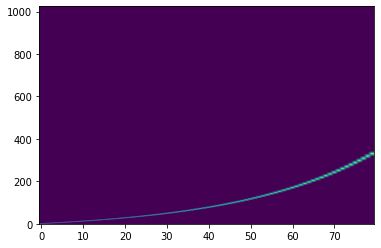

In [77]:
'''
n_mels = 몇개의 멜로 나눌 것인가
n_mels를 나누기 위해 Sample rate가 필요함 
If sampling Rate = 44100이면 최대 주파수는 22500 (Nyquist Frequency)
f_min = 20 // 최저 주파수
f_max = 8000 // 최고 주파수
n_sftf -> 스펙트로그램에서 frequency bin이 몇개인지
'''

mel_scale = torchaudio.transforms.MelScale(n_mels=80, sample_rate = sr, 
                                           f_min = 20, f_max= 8000,
                                           n_stft = spec.shape[0],)

plt.imshow(mel_scale.fb, aspect = 'auto', origin = 'lower')
#y = 400이 8000Hz정도라고 할 수 있음

([<matplotlib.lines.Line2D at 0x7fd3617c1bd0>],
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.6810, 0.3190, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]))

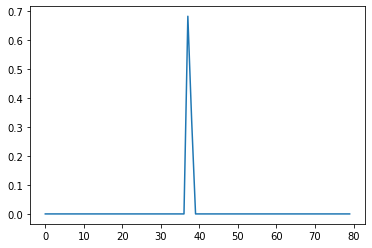

In [83]:
plt.plot(mel_scale.fb[70]), mel_scale.fb[70]
# 70번째 스케일은 약 38정도에서 피크 

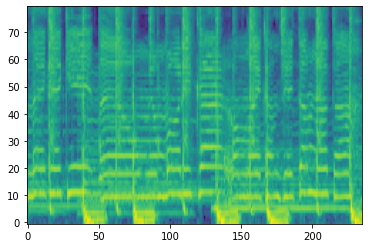

In [84]:
mel_spec = mel_scale(spec)
plt.imshow(torch.log(mel_spec), origin='lower', aspect = 'auto')
# 20Hz ~ 8000Hz로 Mel Scale을 적용한 것 (y축을 바꾼 것이라고 할 수 있다.)

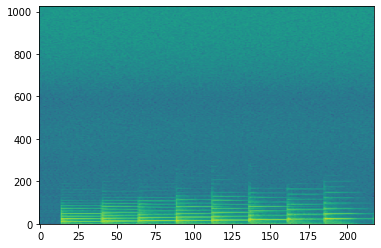

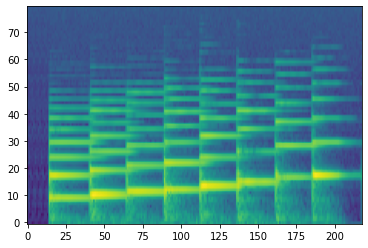

In [86]:
y, sr = torchaudio.load('/content/piano_scale.wav')
y_clip = y[0]

spec = spec_converter(y_clip)
mel_spec = mel_scale(spec)
plt.figure(1)
plt.imshow(torch.log(spec), aspect = 'auto', origin = 'lower')
plt.figure(2)
plt.imshow(torch.log(mel_spec), aspect = 'auto', origin = 'lower')

# mel scale - 저주파일수록 넓고, 고주파일수록 좁아지는, 가독성이 훨씬 좋음
